<a href="https://colab.research.google.com/github/ShiyiXuH/Speech-reconstruction-by-WaveGlow/blob/main/bandpass_filter_exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib.ticker import scale_range
!pip -q install pydub
from pydub import AudioSegment

import time
import os
from os import path
from io import BytesIO
from base64 import b64decode
from urllib.request import urlopen

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import librosa
import librosa.util
import librosa.display

from IPython.display import HTML, display, Audio, Javascript
from google.colab import drive, output
drive.mount("/content/drive")

# Load from gdrive
def librosa_load_path(path, sr=22050):
  return librosa.load(path, sr=sr)

# Z-norm
def znorm(X, means, stds):
  return (X - means) / stds

# plot a wave form, spectrogram and MFCCs
def plot_audio(audio, sample_rate=22050, xlim=[0.0, 1.0]):
  fig, axs = plt.subplots(3, 1, figsize=(10, 16))
  librosa.display.waveshow(audio, ax=axs[0],sr=sample_rate)
  D = librosa.stft(audio, n_fft=512, hop_length=160)
  S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
  librosa.display.specshow(S_db, x_axis='time', y_axis='linear', hop_length=160, ax=axs[1],sr=sample_rate)
  mfcc_features = librosa.feature.mfcc(y=audio, sr=sample_rate)
  librosa.display.specshow(mfcc_features, x_axis='time', ax=axs[2])
  for ax, title in zip(axs, ["waveform", "spectrogram", "MFCC features"]):
    ax.set_xlim(xlim)
    ax.set_title(title)


In [ ]:
import scipy.signal as ss
from scipy.io import wavfile

numtaps = 2048 # length of the filter, even number for this code to work
sr      = 22050 #sample rate of the signal. Check if it is the same for your corpus!

directory_path = "/content/drive/MyDrive/bandpass/normal"

# Load wav files
audio_files= []
file_name=[]
for filename in os.listdir(directory_path):
    if filename.endswith('.wav'):
        file_path = os.path.join(directory_path, filename)
        audio, sample_rate = librosa.load(file_path)
        audio_files.append(audio)
        file_name += [filename]

## Bandpass-filtering with freq band 1

In [ ]:
from google.colab import files
#----------------------Bandpass-filtering with freq band 1----------------------------------
filtered_speech_1 = []
bandpass1 = ss.firwin(numtaps+1,[1,782], fs=sr, pass_zero=False)

for i, audio in enumerate(audio_files):
  audio = np.copy(audio) # different variable, don't change example_audio
  audio = ss.convolve(audio,bandpass1)
  audio = audio[int(numtaps/2)-1:-int(numtaps/2)]
  filtered_speech_1.append(audio)

  # Generate a filename based on the index
  filtered_wav = f"filtered_bin1_{file_name[i]}"
  wavfile.write(filtered_wav, sr, audio)
  #files.download(f"filtered_bin1_{file_name[i]}")

In [ ]:
!zip -r my_wav_files.zip *.wav

updating: filtered_bin1_normal_100.wav (deflated 4%)
updating: filtered_bin1_normal_101.wav (deflated 4%)
updating: filtered_bin1_normal_102.wav (deflated 4%)
updating: filtered_bin1_normal_103.wav (deflated 4%)
updating: filtered_bin1_normal_104.wav (deflated 4%)
updating: filtered_bin1_normal_105.wav (deflated 4%)
updating: filtered_bin1_normal_106.wav (deflated 4%)
updating: filtered_bin1_normal_107.wav (deflated 4%)
updating: filtered_bin1_normal_108.wav (deflated 4%)
updating: filtered_bin1_normal_109.wav (deflated 4%)
updating: filtered_bin1_normal_110.wav (deflated 4%)
updating: filtered_bin1_normal_111.wav (deflated 4%)
updating: filtered_bin1_normal_112.wav (deflated 4%)
updating: filtered_bin1_normal_113.wav (deflated 4%)
updating: filtered_bin1_normal_114.wav (deflated 5%)
updating: filtered_bin1_normal_115.wav (deflated 4%)
updating: filtered_bin1_normal_116.wav (deflated 4%)
updating: filtered_bin1_normal_117.wav (deflated 4%)
updating: filtered_bin1_normal_118.wav (deflat

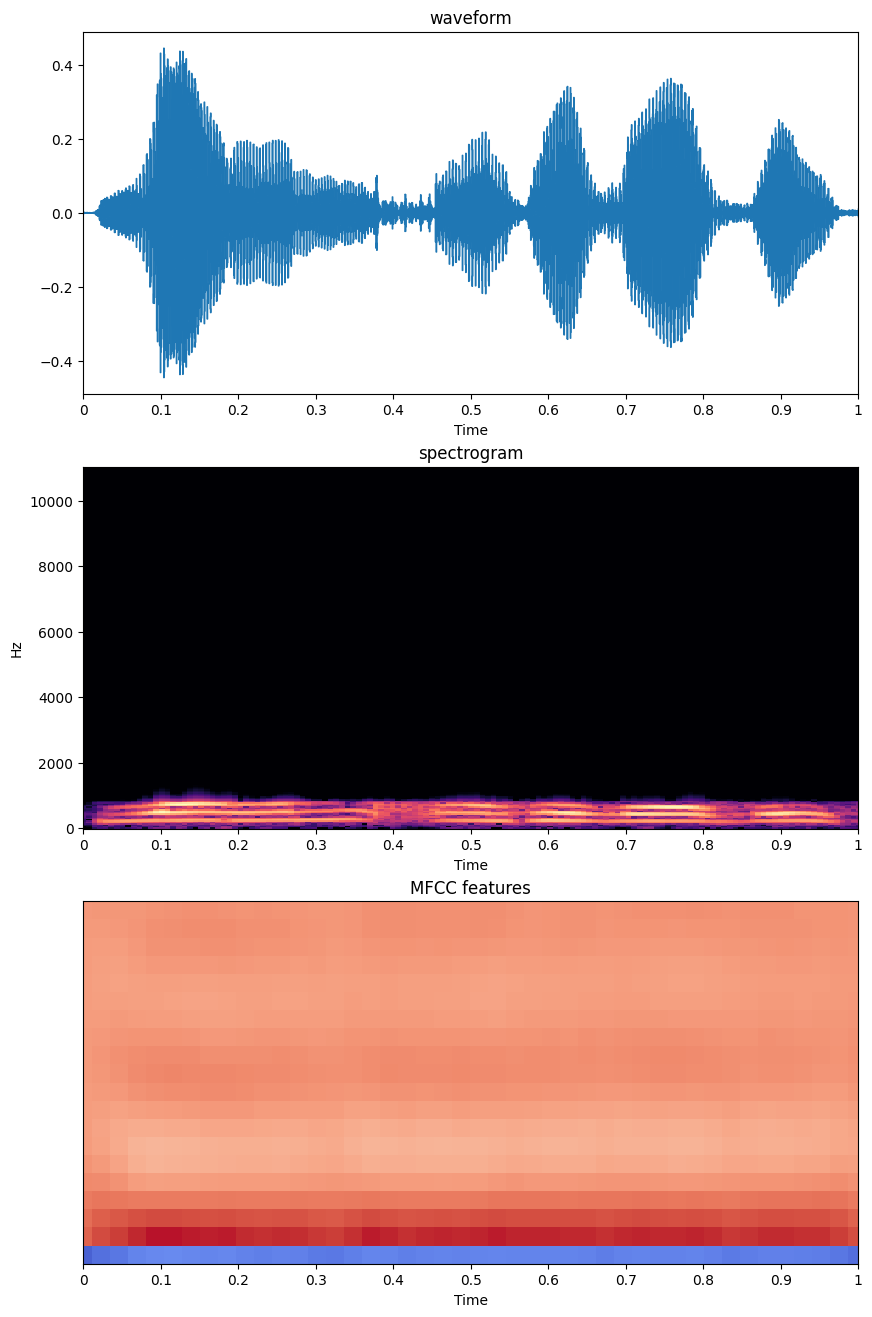

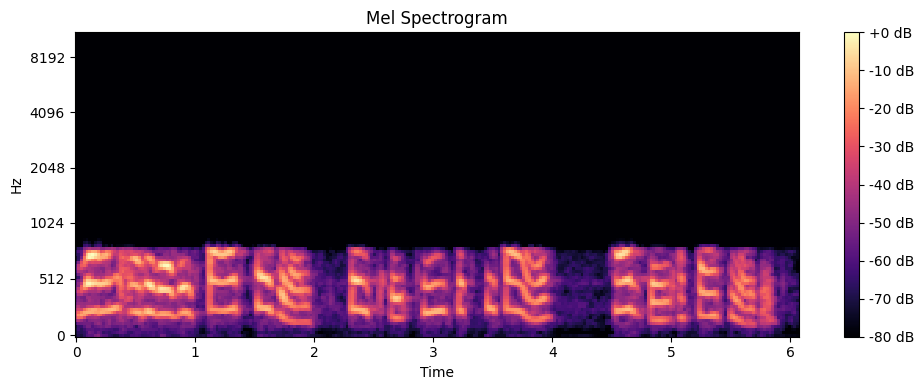

In [ ]:
# Take a look at the filtered speech

#--------------bin1----------------
example_audio = filtered_speech_1[1]
plot_audio(example_audio, sr)
plt.show()

# Get mel spectrogram of the converted speech
mel_spec = librosa.feature.melspectrogram(y=example_audio, sr=sample_rate)
# Convert to dB scale for visualization
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.tight_layout()
plt.show()

## Bandpass-filtering with freq band 2

In [ ]:
#----------------------Bandpass-filtering with freq band 2----------------------------------
filtered_speech_2 = []
bandpass2 = ss.firwin(numtaps+1,[745,1722], fs=sr, pass_zero=False)

for i, audio in enumerate(audio_files):
  audio = np.copy(audio)
  audio = ss.convolve(audio,bandpass2)
  audio = audio[int(numtaps/2)-1:-int(numtaps/2)]
  filtered_speech_2.append(audio)

  # Generate a filename based on the index
  filtered_wav = f"filtered_bin2_{file_name[i]}"
  wavfile.write(filtered_wav, sr, audio)

In [ ]:
!zip -r wav_files.zip *filtered_bin2.wav

	zip warning: name not matched: *filtered_bin2.wav

zip error: Nothing to do! (try: zip -r wav_files.zip . -i *filtered_bin2.wav)


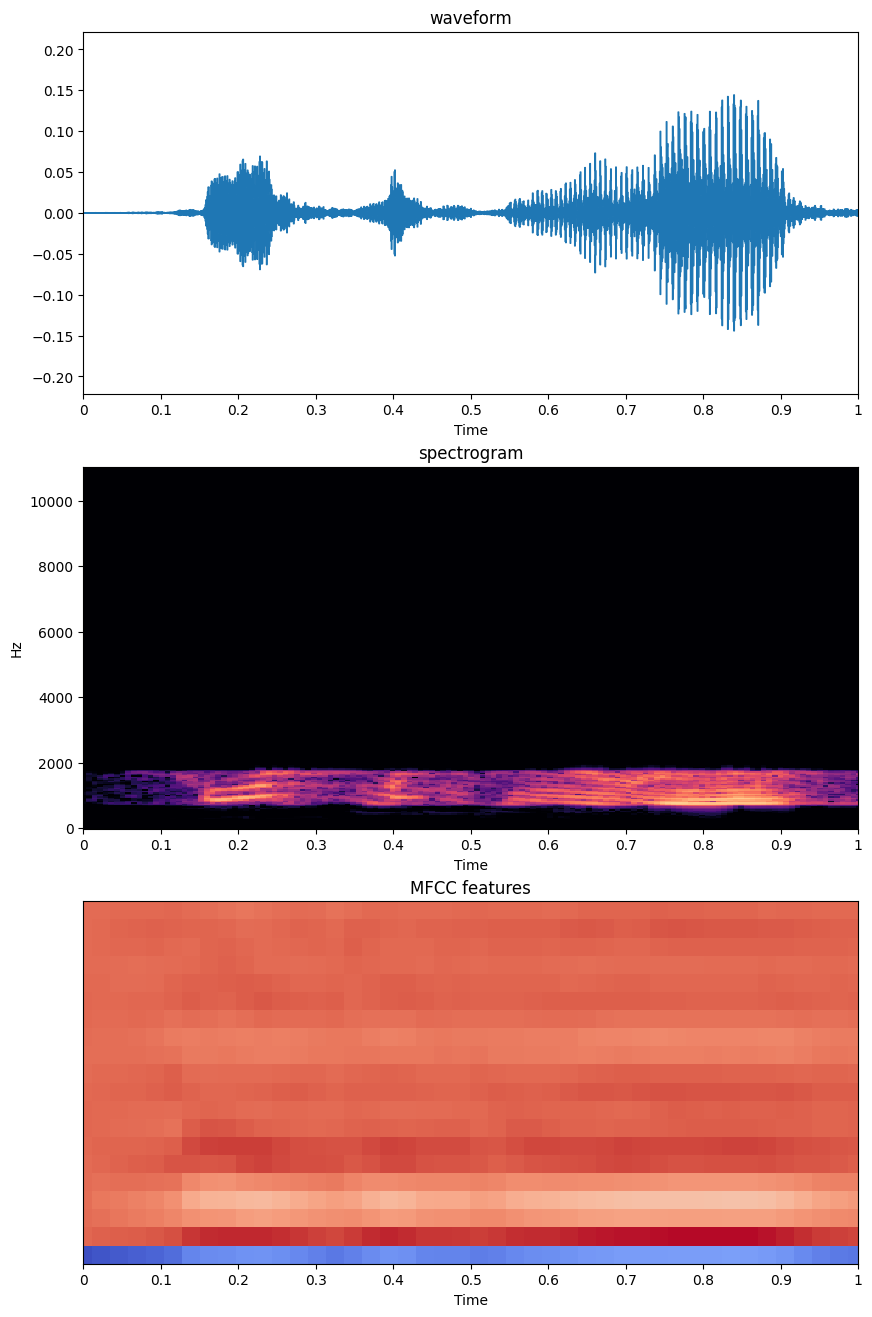

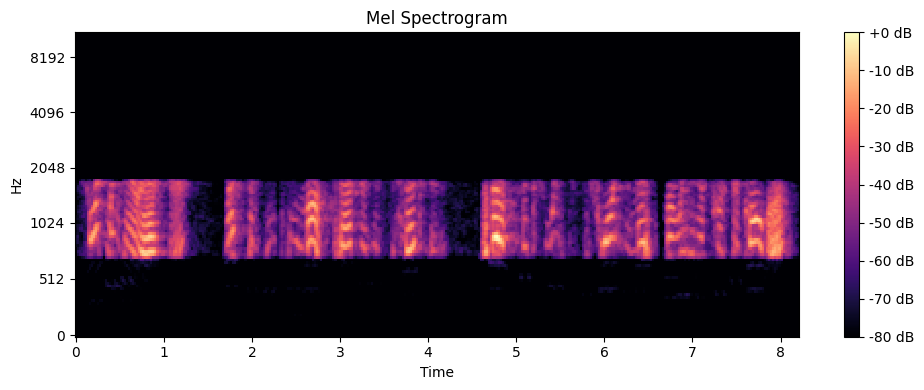

In [ ]:
# Take a look at the filtered speech

#--------------bin2----------------
example_audio2 = filtered_speech_2[1]
plot_audio(example_audio2, sr)
plt.show()

# Get mel spectrogram of the converted speech
mel_spec = librosa.feature.melspectrogram(y=example_audio2, sr=sample_rate)
# Convert to dB scale for visualization
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.tight_layout()
plt.show()

## Bandpass-filtering with freq band 3

In [ ]:
#----------------------Bandpass-filtering with freq band 3----------------------------------
filtered_speech_3 = []
bandpass3 = ss.firwin(numtaps+1,[1657,3711], fs=sr, pass_zero=False)

for i, audio in enumerate(audio_files):
  audio = np.copy(audio)
  audio = ss.convolve(audio,bandpass3)
  audio = audio[int(numtaps/2)-1:-int(numtaps/2)]
  filtered_speech_3.append(audio)

  # Generate a filename based on the index
  filtered_wav = f"filtered_bin3_{file_name[i]}"
  wavfile.write(filtered_wav, sr, audio)

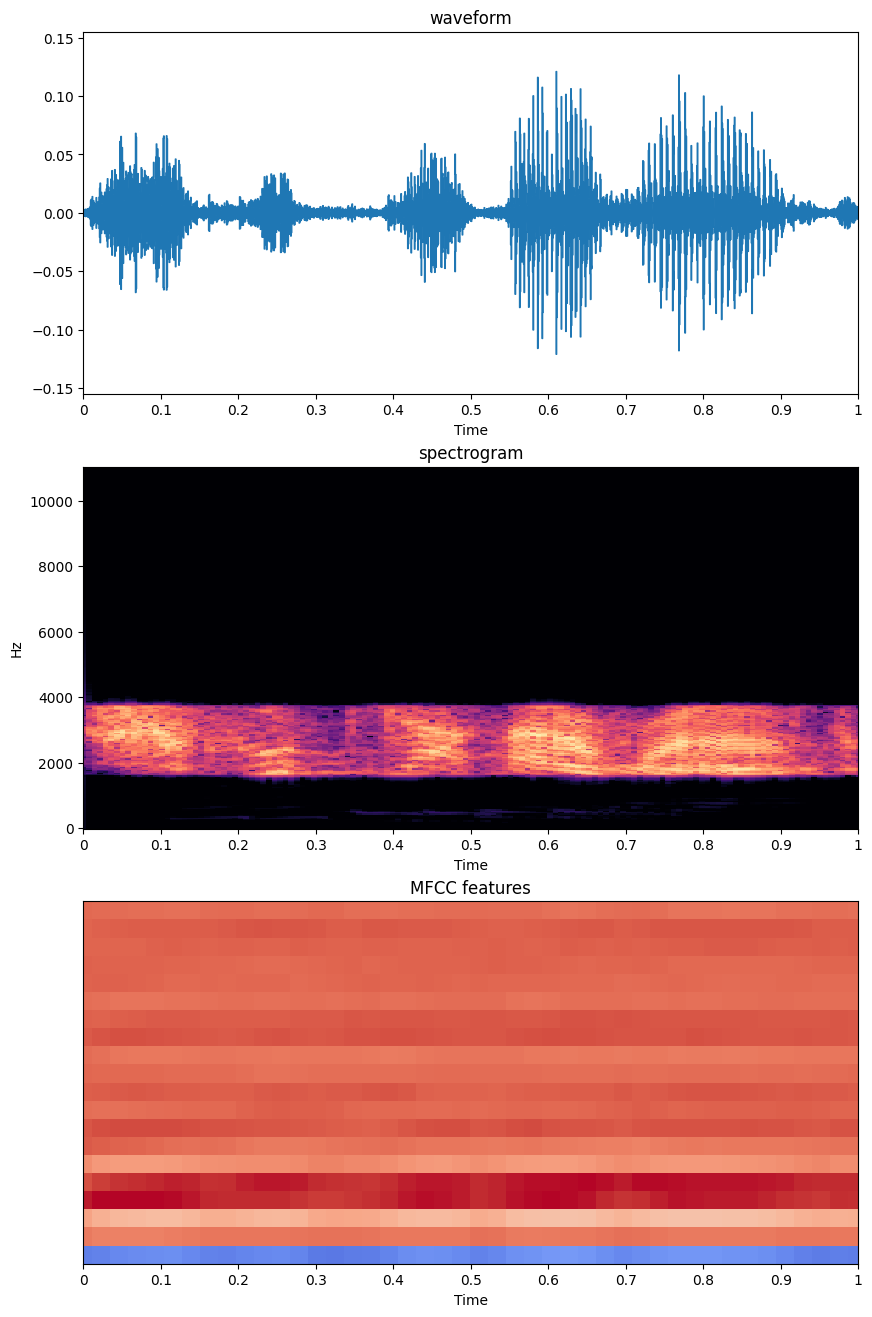

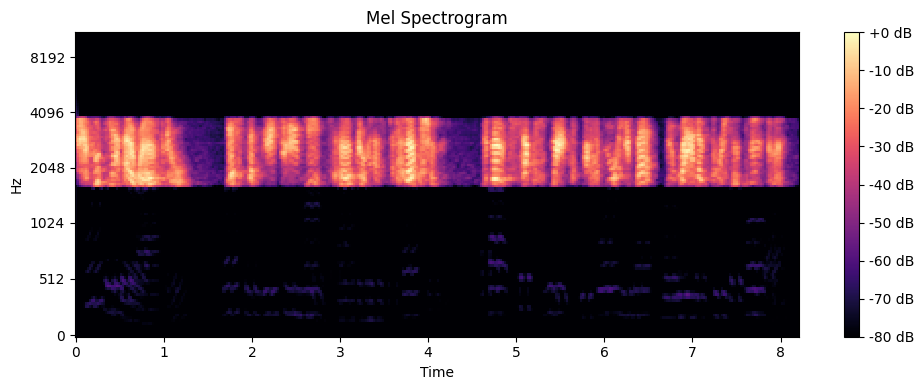

In [ ]:
# Take a look at the filtered speech

#--------------bin3----------------
example_audio3 = filtered_speech_3[1]
plot_audio(example_audio3, sr)
plt.show()

# Get mel spectrogram of the converted speech
mel_spec = librosa.feature.melspectrogram(y=example_audio3, sr=sample_rate)
# Convert to dB scale for visualization
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.tight_layout()
plt.show()

## Bandpass-filtering with freq band 4

In [ ]:
#----------------------Bandpass-filtering with freq band 4----------------------------------
filtered_speech_4 = []
bandpass4 = ss.firwin(numtaps+1,[3571,8000], fs=sr, pass_zero=False)

for i, audio in enumerate(audio_files):
  audio = np.copy(audio)
  audio = ss.convolve(audio,bandpass4)
  audio = audio[int(numtaps/2)-1:-int(numtaps/2)]
  filtered_speech_4.append(audio)

  # Generate a filename based on the index
  filtered_wav = f"filtered_bin4_{file_name[i]}"
  wavfile.write(filtered_wav, sr, audio)

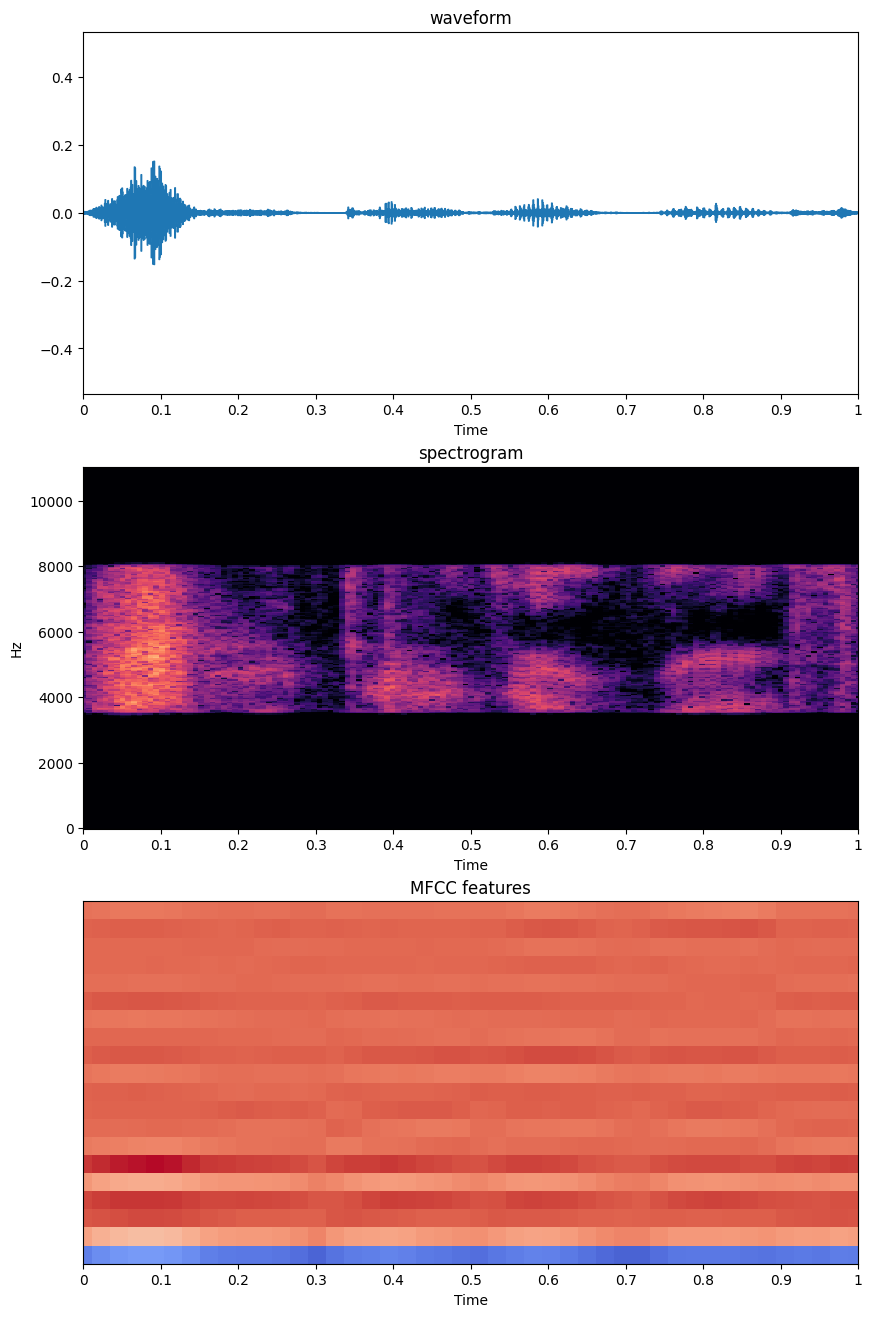

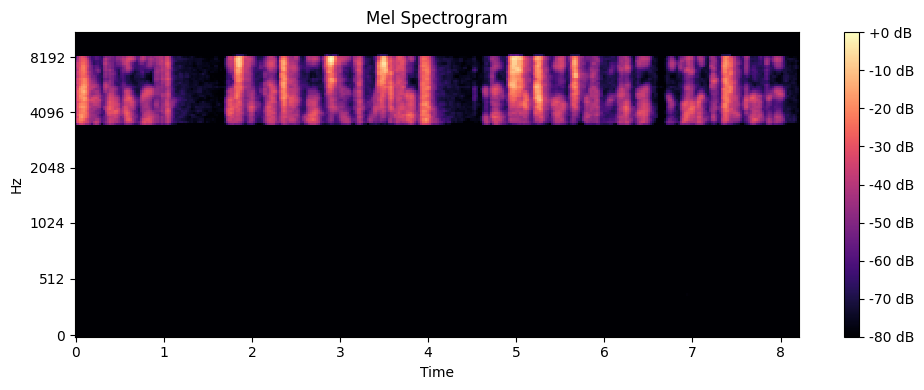

In [ ]:
# Take a look at the filtered speech

#--------------bin3----------------
example_audio4 = filtered_speech_4[1]
plot_audio(example_audio4, sr)
plt.show()

# Get mel spectrogram of the converted speech
mel_spec = librosa.feature.melspectrogram(y=example_audio4, sr=sample_rate)
# Convert to dB scale for visualization
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.tight_layout()
plt.show()

In [ ]:
!zip -r my_wav_files.zip *.wav

updating: filtered_bin1_630000_LJ042-0125.wav (deflated 4%)
updating: filtered_bin1_630000_LJ042-0129.wav (deflated 5%)
updating: filtered_bin1_630000_LJ042-0133.wav (deflated 4%)
updating: filtered_bin1_630000_LJ042-0136.wav (deflated 4%)
updating: filtered_bin1_630000_LJ042-0140.wav (deflated 4%)
updating: filtered_bin1_630000_LJ042-0144.wav (deflated 4%)
updating: filtered_bin1_630000_LJ042-0148.wav (deflated 4%)
updating: filtered_bin1_630000_LJ042-0152.wav (deflated 4%)
updating: filtered_bin1_630000_LJ042-0156.wav (deflated 5%)
updating: filtered_bin1_630000_LJ042-0160.wav (deflated 4%)
updating: filtered_bin1_630000_LJ042-0164.wav (deflated 5%)
updating: filtered_bin1_630000_LJ042-0168.wav (deflated 4%)
updating: filtered_bin1_630000_LJ042-0172.wav (deflated 5%)
updating: filtered_bin1_630000_LJ042-0176.wav (deflated 4%)
updating: filtered_bin1_630000_LJ042-0180.wav (deflated 4%)
updating: filtered_bin1_630000_LJ042-0184.wav (deflated 5%)
updating: filtered_bin1_630000_LJ042-018